In [2]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/willard.hong/Documents/learn/zillow/zillow_zip/data/Zip_Zhvi_SingleFamilyResidence.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,nan,nan,nan,...,1365272,1364535,1357186,1354644,1343961,1336894,1333066,1334392,1343701,1351552
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,359973.000,358681.000,358365.000,...,967517,966429,967322,967450,967003,966057,965021,963959,964246,966092
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,nan,nan,nan,...,1506127,1494778,1481698,1470185,1461983,1457776,1454757,1454081,1460325,1465530
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,198909.000,197774.000,197109.000,...,335155,335051,335418,335480,335596,335547,335395,335309,334819,334762
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,542574.000,540261.000,540278.000,...,1201189,1200418,1201438,1201133,1199177,1197266,1194983,1193391,1193661,1196524


In [4]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
count,30467.000,30467.000,30467.000,13532.000,13617.000,13652.000,13675.000,13710.000,13730.000,13750.000,...,30467.000,30467.000,30467.000,30467.000,30467.000,30467.000,30467.000,30467.000,30467.000,30467.000
mean,80411.040,48772.857,15234.000,127998.860,128059.053,128068.323,128396.732,128521.655,128689.282,128912.183,...,231042.125,231588.543,232168.374,232782.303,233447.053,234103.442,234699.003,235364.467,236125.200,237000.890
std,25500.943,27444.936,8795.210,88874.584,88740.685,88617.349,91441.544,91395.150,91511.321,91749.406,...,276198.938,276318.814,276458.087,276531.701,276775.781,277024.253,277381.785,278244.213,279589.724,281302.665
min,58001.000,501.000,1.000,10702.000,10658.000,10687.000,10789.000,10928.000,11041.000,11068.000,...,10715.000,10758.000,10802.000,10841.000,10921.000,10980.000,11105.000,11283.000,11468.000,11624.000
25%,68821.000,25864.500,7617.500,71620.750,71663.000,71658.750,71896.000,72051.250,72205.500,72331.500,...,103045.000,103387.000,103806.000,104195.500,104533.000,104926.500,105270.500,105569.000,105887.500,106186.500
50%,79173.000,48316.000,15234.000,107569.500,107763.000,107743.500,107883.000,107965.000,108299.000,108492.000,...,160177.000,160884.000,161544.000,162243.000,162795.000,163374.000,163866.000,164424.000,164810.000,165422.000
75%,89237.500,71735.000,22850.500,159283.000,159242.000,159444.500,159700.500,159911.000,160108.500,160280.000,...,261600.000,262318.500,263199.500,264092.000,264820.000,265757.000,266494.000,267326.000,268018.500,268765.500
max,753844.000,99929.000,30467.000,1718298.000,1670475.000,1622598.000,2806460.000,2804899.000,2826827.000,2859863.000,...,8143734.000,8154860.000,8192394.000,8150287.000,8070832.000,7984498.000,7915455.000,7890253.000,7911278.000,7939527.000


In [5]:
df.rename(columns={"RegionName":"ZipCode"}, inplace=True)
df["ZipCode"]=df["ZipCode"].map(lambda x: "{:.0f}".format(x))
df["RegionID"]=df["RegionID"].map(lambda x: "{:.0f}".format(x))
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,nan,nan,nan,...,1365272,1364535,1357186,1354644,1343961,1336894,1333066,1334392,1343701,1351552
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,359973.000,358681.000,358365.000,...,967517,966429,967322,967450,967003,966057,965021,963959,964246,966092
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,nan,nan,nan,...,1506127,1494778,1481698,1470185,1461983,1457776,1454757,1454081,1460325,1465530
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,198909.000,197774.000,197109.000,...,335155,335051,335418,335480,335596,335547,335395,335309,334819,334762
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,542574.000,540261.000,540278.000,...,1201189,1200418,1201438,1201133,1199177,1197266,1194983,1193391,1193661,1196524


In [9]:
df[df['ZipCode'] == '94122']

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
390,97576,94122,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,391,288680.000,288135.000,287723.000,...,1445911,1440894,1440060,1436002,1441151,1448126,1458592,1474295,1483562,1495453


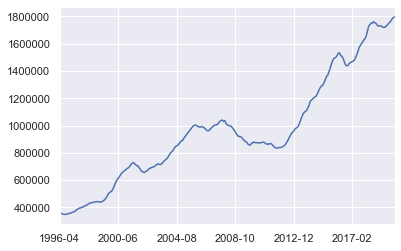

In [23]:
median_prices = df.median()
sf_prices = df[df["City"] == "San Francisco"].drop(['RegionID','ZipCode','SizeRank'], axis=1)
sf_prices.median().plot()

In [24]:
median_prices.tail()

2019-10   163374.000
2019-11   163866.000
2019-12   164424.000
2020-01   164810.000
2020-02   165422.000
dtype: float64

In [25]:
sf_df = df[df["City"] == "San Francisco"].median()
df_comparison = pd.concat([sf_df,median_prices], axis=1)
df_comparison.columns = ["San Francisco","Median USA"]
df_comparison.tail()

,San Francisco,Median USA
2019-10,1757753.000,163374.000
2019-11,1769095.000,163866.000
2019-12,1783188.000,164424.000
2020-01,1791279.000,164810.000
2020-02,1798025.000,165422.000
